<a href="https://colab.research.google.com/github/JungyuBaeck/Jungyu-astron1221/blob/main/Galactic_bulge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Galactic bulge mass = 1.5e10*M

In [1]:
import astropy.constants as ac #import a Python package to call the value of certain constants.
import astropy.units as u # import a Python package to call certain unit, e.g., the mass of the Sun
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Below we define input M and R
M= 1 * u.earthMass


In [3]:
def calculatingorbitalvelocity(M, R):
    """
    This is afunction that calculates the orbital velocity
    Input:
    M, the mass of the central object
    R, the orbital radius of the satellite
    Output:
    orbitalVelocity, the orbital velocity of the satellite
    """
    orbitalVelocity = np.sqrt(ac.G * M /R)
    return orbitalVelocity

In [4]:
M_bulge = 1e10 * u.Msun

print (M_bulge.to(u.kg))

1.988409870698051e+40 kg


In [5]:
def calculate_orbital_velocity(M, R):
  """
  Calculate the orbital velocity
  Input: M - mass, R = orbital radius
  Output: v - orbital velocity
  """
  v = np.sqrt(ac.G * M / R)
  return(v)

In [6]:
R_bulge = np. arange(1 , 35 ) * u.kpc
print (R_bulge.to(u.km))


[3.08567758e+16 6.17135516e+16 9.25703274e+16 1.23427103e+17
 1.54283879e+17 1.85140655e+17 2.15997431e+17 2.46854207e+17
 2.77710982e+17 3.08567758e+17 3.39424534e+17 3.70281310e+17
 4.01138086e+17 4.31994861e+17 4.62851637e+17 4.93708413e+17
 5.24565189e+17 5.55421965e+17 5.86278740e+17 6.17135516e+17
 6.47992292e+17 6.78849068e+17 7.09705844e+17 7.40562620e+17
 7.71419395e+17 8.02276171e+17 8.33132947e+17 8.63989723e+17
 8.94846499e+17 9.25703274e+17 9.56560050e+17 9.87416826e+17
 1.01827360e+18 1.04913038e+18] km


In [7]:
v_bulge = np.sqrt(ac.G * M_bulge / R_bulge)
print (v_bulge.to(u.km/u.s))

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177  37.86342681
  37.2477203   36.66110537  36.10136097  35.56649642] km / s


In [8]:
v_bulge_arr = calculatingorbitalvelocity(M_bulge, R_bulge)
print(v_bulge_arr.to(u.km/u.s))

[207.3865297  146.64442148 119.73466875 103.69326485  92.7460756
  84.66519621  78.38474041  73.32221074  69.12884323  65.58137899
  62.52939142  59.86733437  57.51867436  55.42638148  53.54697172
  51.84663242  50.2986216   48.88147383  47.57773291  46.3730378
  45.25545097  44.21495669  43.24308072  42.33259811  41.47730594
  40.67184468  39.91155625  39.1923702   38.51071177  37.86342681
  37.2477203   36.66110537  36.10136097  35.56649642] km / s


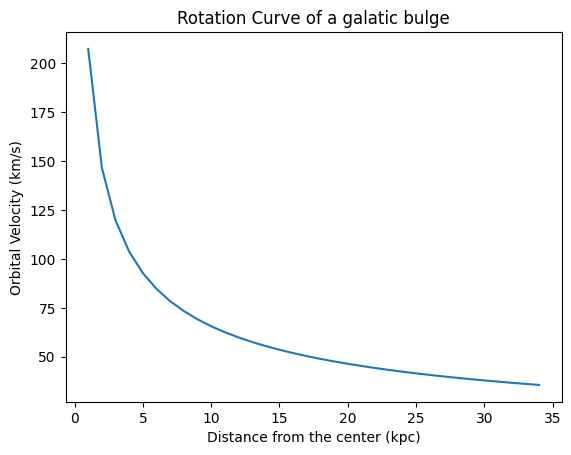

In [9]:
plt.plot(R_bulge, v_bulge_arr.to(u.km/u.s)) #
plt.xlabel('Distance from the center (kpc)') # label x axis
plt.ylabel('Orbital Velocity (km/s)') # label y axis
plt.title('Rotation Curve of a galatic bulge') # label title
plt.show()

In [10]:
M_disk = 1e11 * u.solMass # Define disk total mass
R_disk = 10 * u.kpc # Define the outer edge of disk radius
density_disk = M_disk / (np.pi * (R_disk**2)) # here the density is in the unit of solar mass per square kpc
print(density_disk.to(1e6 * u.solMass/u.kpc**2))

318.3098861837907 1e+06 solMass / kpc2


In [11]:
def calculatingEnclosedMassForDisk(R, density=318 * 1e6 * u.solMass/u.kpc**2):
    """
    Calculate enclosed mass for the disk component
    Input: R - orbital radius, density - density of the disk as calculated above
    Output: M - enclosed mass
    """
    if R < 10 * u.kpc:
        M = np.pi * (R**2) * density
    else:
        R = 10 * u.kpc # any radius larger than 10 kpc will be trucated at 10 kpc because of the extent of the disk component
        M = np.pi * (R**2) * density
    return(M)

In [12]:
print(calculatingEnclosedMassForDisk(1 * u.kpc).to(1e6 * u.solMass), "at 1 kpc") # to convert to million solar mass to increase readability
print(calculatingEnclosedMassForDisk(5 * u.kpc).to(1e6 * u.solMass), "at 5 kpc")

999.0264638415543 1e+06 solMass at 1 kpc
24975.66159603886 1e+06 solMass at 5 kpc


In [13]:

def calculatingEnclosedMassForMilkyWay(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
    """
    Note that the halo mass is missing here, so that is what you will work on this Friday
    """
    M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
    M_total = M_disk + M_bulge
    return(M_total)

In [14]:
# redefine v_bulge_arr to avoid confusion
v_bulge_arr = calculate_orbital_velocity(M_bulge, R_bulge)

In [15]:
# Define arrays to be calculated
M_disk = np.zeros(len(R_bulge)) * u.solMass # Don't forget unit here
M_total = np.zeros(len(R_bulge)) * u.solMass

# Calculating enclosed masses for the disk and total component
for i in np.arange(len(R_bulge)):
    M_disk[i] = calculatingEnclosedMassForDisk(R_bulge[i])
    M_total[i] = calculatingEnclosedMassForMilkyWay(R_bulge[i])

# Calculating the resulting orbital velocity due to each component
v_disk_arr = calculate_orbital_velocity(M_disk, R_bulge)
v_bulge_disk_arr = calculate_orbital_velocity(M_total, R_bulge)



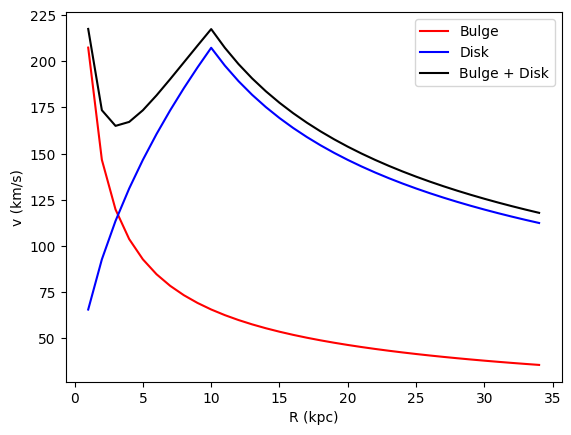

In [16]:

# Plot them all
plt.plot(R_bulge.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge") # note that here we can add label to the rotation curve caused by the Bulge
plt.plot(R_bulge.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk") # plotting disk
plt.plot(R_bulge.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk") # plotting bulge + disk components
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend() # to show the legend of a figure
plt.show()

In [17]:
# Define the halo mass
M_halo = 1e12 * u.solMass

# Define the halo radius
R_halo = 20 * u.kpc

# Calculate the density of the halo
density_halo = M_halo / ((4/3) * np.pi * (R_halo**3))

# Print the density of the halo
print(density_halo.to(1e6 * u.solMass/u.kpc**3))

29.841551829730374 1e+06 solMass / kpc3


In [18]:
# Function to calculate the enclosed mass for the halo
def calculatingEnclosedMassForHalo(R, density=density_halo):
  """
  Calculate enclosed mass for the halo component
  Input: R - orbital radius, density - density of the halo as calculated above
  Output: M - enclosed mass
  """
  if R < 30 * u.kpc:
    M = (4/3) * np.pi * (R**3) * density
  elif R >= 30 * u.kpc:
    R = 30 * u.kpc  # any radius larger than 20 kpc will be trucated at 20 kpc because of the extent of the halo component
    M = (4/3) * np.pi * (R**3) * density
  return(M)

In [19]:
# Calculate the enclosed mass for the halo at different radii
print(calculatingEnclosedMassForHalo(1 * u.kpc).to(1e9 * u.solMass), "at 1 kpc")
print(calculatingEnclosedMassForHalo(5 * u.kpc).to(1e9 * u.solMass), "at 5 kpc")
print(calculatingEnclosedMassForHalo(10 * u.kpc).to(1e9 * u.solMass), "at 10 kpc")
print(calculatingEnclosedMassForHalo(20 * u.kpc).to(1e9 * u.solMass), "at 20 kpc")
print(calculatingEnclosedMassForHalo(30 * u.kpc).to(1e9 * u.solMass), "at 30 kpc")


0.12499999999999999 1e+09 solMass at 1 kpc
15.625000000000002 1e+09 solMass at 5 kpc
125.00000000000001 1e+09 solMass at 10 kpc
1000.0000000000001 1e+09 solMass at 20 kpc
3374.9999999999995 1e+09 solMass at 30 kpc


In [20]:
# Function to calculate the total enclosed mass for the Milky Way
def calculatingEnclosedMassForMilkyWay_halo(R, density_disk=318 * 1e6 * u.solMass/u.kpc**2, M_bulge = 1e10 * u.solMass):
  """
  Calculate the total enclosed mass for the Milky Way, including the halo
  """
  M_disk = calculatingEnclosedMassForDisk(R, density=density_disk)
  M_halo = calculatingEnclosedMassForHalo(R)
  M_total = M_disk + M_bulge + M_halo
  return(M_total)


In [21]:
# Redefine arrays to be calculated
M_halo = np.zeros(len(R_bulge)) * u.solMass
M_total = np.zeros(len(R_bulge)) * u.solMass



In [22]:
# Calculate the enclosed masses for the halo and total component
for i in np.arange(len(R_bulge)):
    M_halo[i] = calculatingEnclosedMassForHalo(R_bulge[i])

# Calculate the resulting orbital velocity of halo
v_halo_arr = calculate_orbital_velocity(M_halo, R_bulge)

# Calculate the total enclosed mass for the Milky Way
for i in np.arange(len(R_bulge)):
    M_total[i] = calculatingEnclosedMassForMilkyWay_halo(R_bulge[i])

# Calculate the resulting orbital velocity of bulge + disk + halo
v_bulge_disk_halo_arr = calculate_orbital_velocity(M_total, R_bulge)



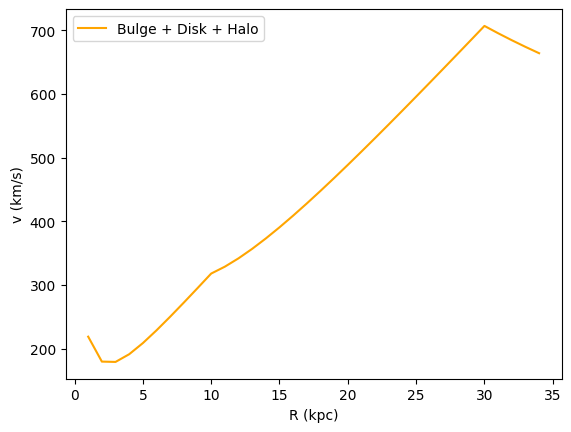

In [23]:
# Plot the rotation curve of total
plt.plot(R_bulge.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="orange", label="Bulge + Disk + Halo")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()

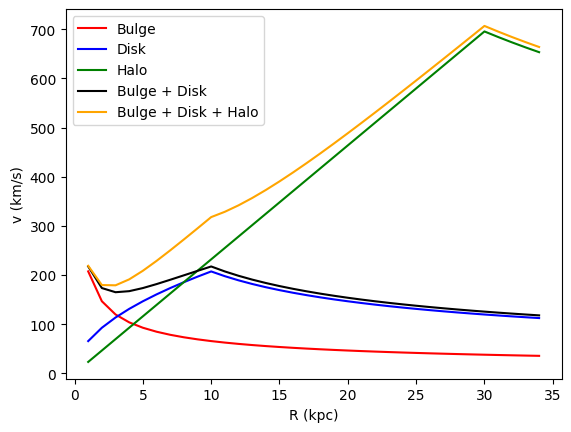

In [24]:
# Plot the rotation curve
plt.plot(R_bulge.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge")
plt.plot(R_bulge.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk")
plt.plot(R_bulge.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo")
plt.plot(R_bulge.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk")
plt.plot(R_bulge.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="orange", label="Bulge + Disk + Halo")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()

In [ ]:
# The following code allows you to upload a data file that you can find in my github page:
# https://github.com/wj198414/ASTRON1221/blob/main/DarkMatter/galaxy_rotation_2006.txt
from google.colab import files
uploaded = files.upload()

In [ ]:

# Read in the file
import astropy.io.ascii
tab = astropy.io.ascii.read("galaxy_rotation_2006.txt")


In [ ]:
# Plot the rotation curve
plt.plot(R_bulge.to(u.kpc), v_bulge_arr.to(u.km/u.s), color="red", label="Bulge")
plt.plot(R_bulge.to(u.kpc), v_disk_arr.to(u.km/u.s), color="blue", label="Disk")
plt.plot(R_bulge.to(u.kpc), v_halo_arr.to(u.km/u.s), color="green", label="Halo")
plt.plot(R_bulge.to(u.kpc), v_bulge_disk_arr.to(u.km/u.s), color="black", label="Bulge + Disk")
plt.plot(R_bulge.to(u.kpc), v_bulge_disk_halo_arr.to(u.km/u.s), color="orange", label="Bulge + Disk + Halo")
plt.errorbar(tab["col2"], tab["col3"], yerr=tab["col4"], ecolor="black", color="black", fmt='o', label="Data")
plt.xlabel('R (kpc)')
plt.ylabel('v (km/s)')
plt.legend()
plt.show()